In [46]:
import numpy as np
from numpy.linalg import inv, pinv, norm
from matplotlib import pyplot as plt

In [47]:
# ns = [int(n) for n in np.logspace(1,3,8)]
n = 100
k = 20
lamda = 100
scale = 1
e2s = np.logspace(-10,10,20)
e1 = 0
title_str = f'foward_error_n={n}_k={k}_lambda={lamda}_e1={e1}'
num_experiments = 100

In [48]:
def compute_SMW(n,k,A,B,U,V,lamda,e1,e2,rand_seed=1):
    # np.random.seed(rand_seed)
    noise1 = np.random.normal(size=(n,n))
    noise1 *= e1/norm(noise1,ord=2)
    noise2 = np.random.normal(size=(k,k))
    noise2 *= e2/norm(noise2,ord=2)

    A_inv = inv(A)
    A_inv_norm = norm(A_inv,ord=2)
    A_til_inv = A_inv + noise1
    Z_inv = inv(np.eye(k)+V.T@A_til_inv@U) + noise2
    B_inv_approx = A_til_inv - A_til_inv@U@Z_inv@V.T@A_til_inv
    B_inv = inv(B) #A_inv - A_inv@U@inv(np.eye(k)+V.T@A_inv@U)@V.T@A_inv 
    error = norm(B_inv-B_inv_approx,ord=2)
    bound = A_inv_norm**2*lamda*e2
    # B_inv_A_norm = norm(B_inv@A,ord=2)
    # full_bound = e1 + ((A_inv_norm + e1)**2)*lamda*(e2+2*lamda*B_inv_A_norm**2*e1)+(2*A_inv_norm+e1)*lamda*B_inv_A_norm*e1
    return error,bound


In [43]:
errors = np.zeros_like(e2s,dtype=float)
bounds = np.zeros_like(e2s,dtype=float)
A = np.random.normal(size=(n,n),scale= scale)
U = np.random.normal(size=(n,k))
U /= norm(U, ord=2)
V = np.random.normal(size=(n,k))
V /= norm(V, ord=2)
B = A + lamda*U@V.T



for i,e2 in enumerate(e2s):
    e_i = np.zeros(num_experiments); b_i = np.zeros(num_experiments)
    for j in range(num_experiments):
        e_i[j],b_i[j] = compute_SMW(n,k,A,B,np.sqrt(lamda)*U,np.sqrt(lamda)*V,lamda,e1,e2,j)
    errors[i] = np.mean(e_i)
    bounds[i] = np.mean(b_i)
    # print("n = %d, k = %d, e1 = %f, e2 = %f, norm(B^-1A) = %f"%(n,k,e1,e2,norm(inv(B)@A,ord=2)))
    # print("error = %f, bound = %f" %(errors[i],bounds[i]))

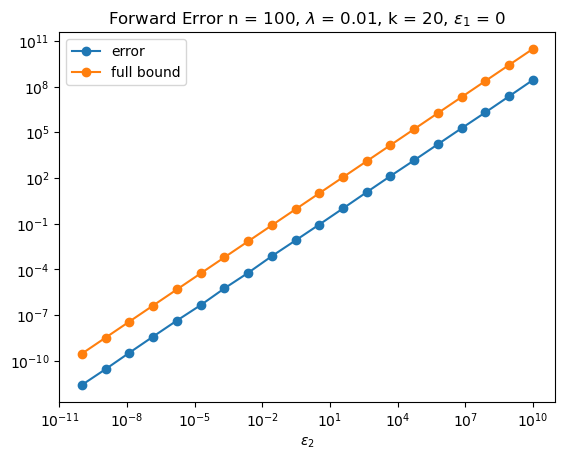

In [44]:
plt.loglog(e2s,errors,label='error',marker='o')
plt.loglog(e2s,bounds,label='full bound',marker='o')
# plt.loglog(e2s,full_bounds,label='full bound',marker='o')
# plt.axvline(x=1/2/lamda/norm(inv(B)@A,ord=2),ls=':',color='red',label=r'$\frac{1}{2\lambda \kappa(V)\|B^{-1}A \|_2}$')
plt.legend()
plt.xlabel(r'$\epsilon_2$')
plt.title(f'Forward Error n = {n}, '+r'$\lambda$'+f' = {lamda}, k = {k}, '+r'$\epsilon_1$'+f' = {e1}')  #'Approximation Error of '+r'$B^{-1}$'+'(Forward Error n = '+str(n)+ ' )'
plt.savefig('e1_zero_forward/'+title_str+'.png')
# plt.title(r'$\|{B^{-1}- \left(\widetilde{A}^{-1} -\widetilde{A}^{-1}U Z^{-1} V^T \widetilde{A}^{-1} \right) } \|_2$')


In [45]:
bounds-errors

array([2.97088292e-10, 3.35463307e-09, 3.78511870e-08, 4.27209468e-07,
       4.82290534e-06, 5.44878741e-05, 6.14500545e-04, 6.94133066e-03,
       7.82839660e-02, 8.84069152e-01, 9.98181369e+00, 1.12667355e+02,
       1.27144415e+03, 1.43504754e+04, 1.62054031e+05, 1.82933547e+06,
       2.06509848e+07, 2.33186508e+08, 2.63195081e+09, 2.97021289e+10])